In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Tarjetas de credito

Este dataset se utilizara para intentar determinar factores que señalen posibles clientes que dejen de utilizar el servicio de la Tarjeta de Credito.

Link: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

In [ ]:
bank_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSz3Yx52trZcGRODnR1-aMr8bTTKZDGsZbJj1kw5ms_H5ZOypBXNd2Hyx1bn1A8sznMTQOtCUniEnvJ/pub?output=csv")

In [ ]:
pd.options.display.max_columns = None
bank_df.head(4)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987


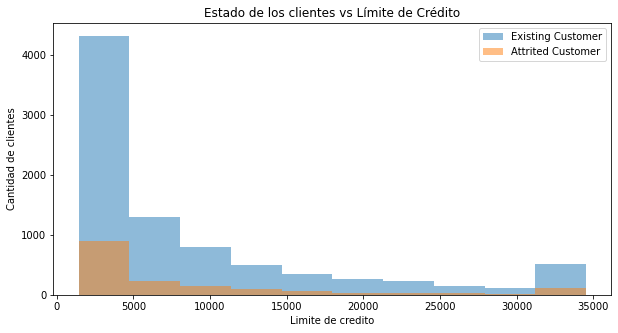

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(
    x = bank_df[bank_df.Attrition_Flag=='Existing Customer'].Credit_Limit, 
    bins=10, 
    alpha=0.5, 
    label='Existing Customer')

ax.hist(
    x = bank_df[bank_df.Attrition_Flag=='Attrited Customer'].Credit_Limit, 
    bins=10, 
    alpha=0.5, 
    label='Attrited Customer')

ax.legend(loc='best')
ax.set_ylabel('Cantidad de clientes')
ax.set_xlabel('Limite de credito')
ax.set_title('Estado de los clientes vs Límite de Crédito')
plt.show()

En este grafico se pueden ver la cantidad de clientes que posee distinto limite de credito. 

Se encuentran diferenciados en clietes en existencia y clientes retirados

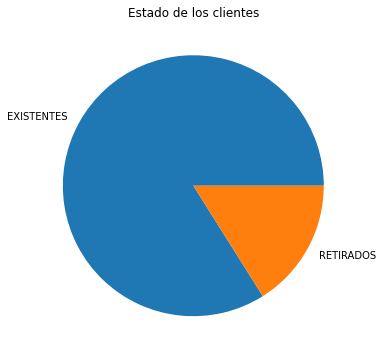

In [ ]:
Clientes = ['EXISTENTES', 'RETIRADOS']
data = bank_df.Attrition_Flag.value_counts()
fig,ax = plt.subplots(figsize =(6, 6))
ax.pie(data, labels = Clientes)
ax.set_title('Estado de los clientes')

plt.show()

Gráfico Piechart: Este gráfico nos muestra cuantos son los clientes existentes (8500) y cuantos son los clientes retirados(1627) de un total de 10127.

Categoria de tarjetas


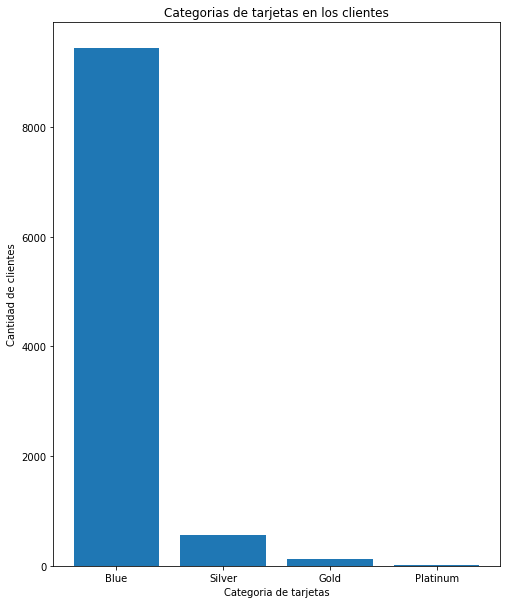

In [ ]:
fig, ax = plt.subplots(figsize=(8,10))
categorias_acumuladas = bank_df.Card_Category.value_counts()
ax.bar(categorias_acumuladas.index,categorias_acumuladas)
ax.set_title('Categorias de tarjetas en los clientes')
ax.set_ylabel('Cantidad de clientes')
ax.set_xlabel('Categoria de tarjetas')
plt.show()

Gráfico de Barras: En este gráfico podemos ver cuantos clientes, tienen tarjeta Blue, Gold, Platinum y Silver.

In [ ]:
columns_name = list(bank_df.columns.values)  #  Se arma una lista con los nombres de las columnas para usarla a continuacion

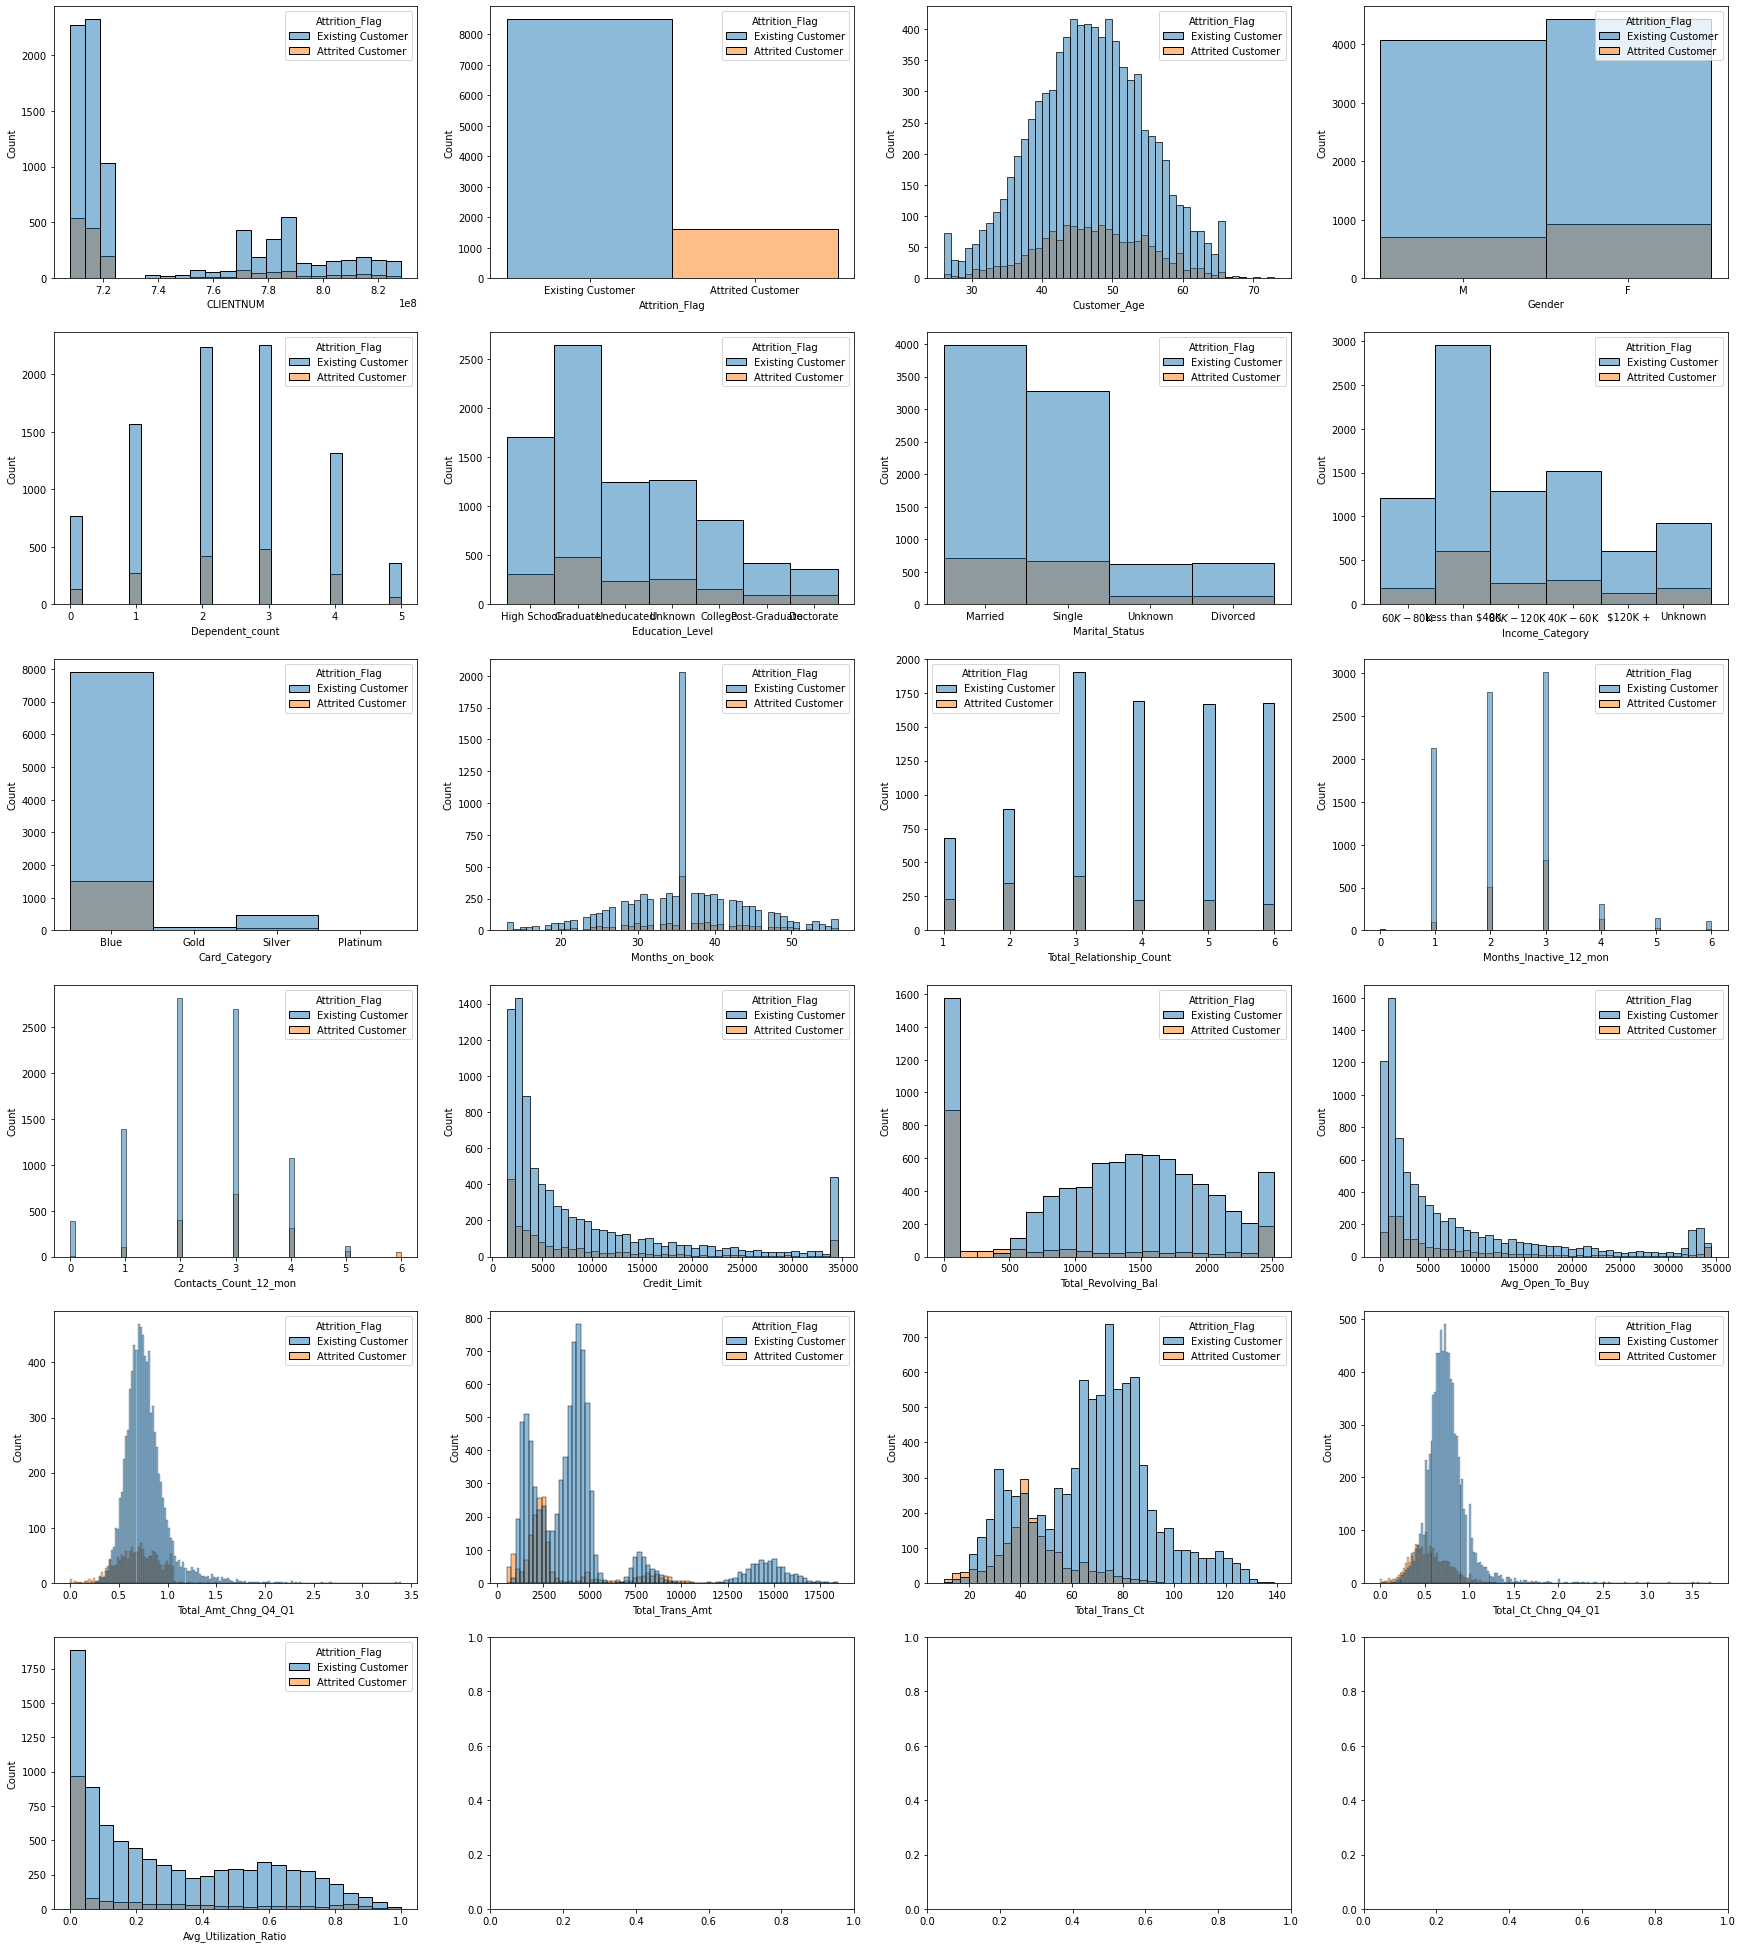

In [ ]:
fig , axes = plt.subplots(6,4,figsize = (30,35))
i = 0
for fil in range(6):
  for col in range(4):
    if i <=20:                                    #  esta condicion se plantea ya que las ultimas 2 columnas del dataset no hay que usarlas para analisi segun la pagina
        sns.histplot(data=bank_df,
              ax=axes[fil,col],
              x=columns_name[i],
              hue = 'Attrition_Flag'
              )
        i = i + 1
plt.show()

Este conjunto de graficos se realizo para intentar encontrar alguna relacion interesante entre las diferentes columnas del dataset. 

Para hacer el analisis, se los agrupo por Attrition_Flag

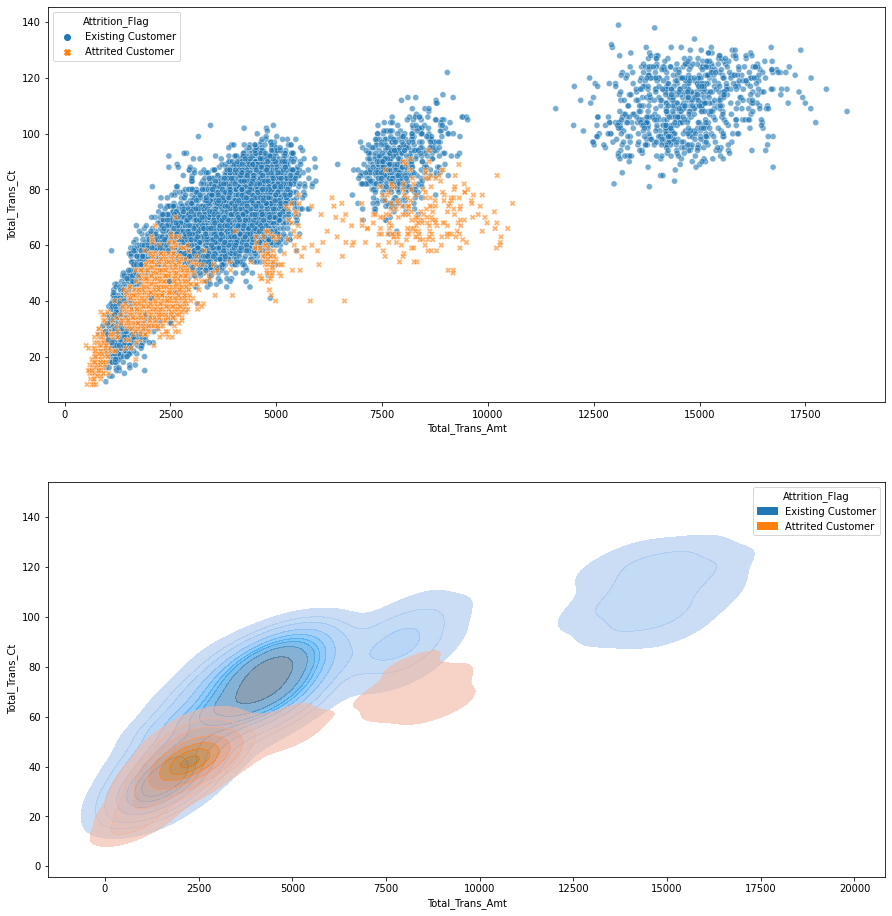

In [ ]:
fig,axes = plt.subplots(2,1,figsize=(15,16))
sns.scatterplot(ax=axes[0],
                data = bank_df,
                x='Total_Trans_Amt', 
                y='Total_Trans_Ct',
                hue = 'Attrition_Flag',
                style='Attrition_Flag',
                sizes=(20,500),
                alpha = .6,
                )
sns.kdeplot(ax=axes[1],
            data = bank_df,
            x='Total_Trans_Amt', 
            y='Total_Trans_Ct',
            hue = 'Attrition_Flag',
            fill = True,
            alpha = .6,
            )
plt.show()

En este grafico podriamos determinar o armar grupos. En donde, podriamos casi asegurar que los clientes que realizan mas 70 transacciones, o los clientes que realizan transacciones de mas de 10.000 dolares NO tienen potencial de abandonar el banco. 

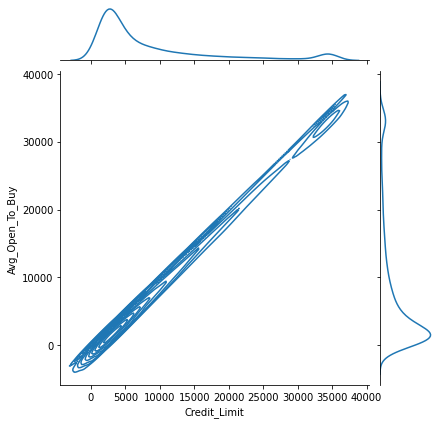

In [ ]:
sns.jointplot(x=bank_df['Credit_Limit'],
              y=bank_df['Avg_Open_To_Buy'],
              kind="kde")
plt.show()

Este grafico muestra que la media de Open To Buy (que significa cuanto puede comprar la persona sin tener probelmas crediticios) se da para valores bajos de limites de credito.